In [2]:
############################
###     remaining all    ###
############################
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import EventCollection

# read force from the two .xvg files
data1 = np.loadtxt('/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating/analysis/RMSF/1.xvg', comments=['@', '#'])
data2 = np.loadtxt('/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating/analysis/RMSF/2.xvg', comments=['@', '#'])
data3 = np.loadtxt('/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro+1protonating/analysis/RMSF/3.xvg', comments=['@', '#'])
data4 = np.loadtxt('/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating/analysis/RMSF/1.xvg', comments=['@', '#'])
data5 = np.loadtxt('/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating/analysis/RMSF/2.xvg', comments=['@', '#'])
data6 = np.loadtxt('/data/jychen/MD_projects/SMC/All_Atoms/normalMD/Fullpro_DNA+1protonating/analysis/RMSF/3.xvg', comments=['@', '#'])

# extract x and y data from the files
xdata1 = data1[:, 0]
ydata1 = data1[:, 1]
xdata2 = data2[:, 0]
ydata2 = data2[:, 1]
xdata3 = data3[:, 0]
ydata3 = data3[:, 1]
xdata4 = data4[:, 0]
ydata4 = data4[:, 1]
xdata5 = data5[:, 0]
ydata5 = data5[:, 1]
xdata6 = data6[:, 0]
ydata6 = data6[:, 1]

xdata1 = xdata1 + 377
print(xdata1)

# 创建一个新的列表来存储每帧的平均值和误差棒
average_values1 = []
errors1 = []

# 创建一个新的列表来存储第二组数据每帧的平均值和误差棒
average_values2 = []
errors2 = []

# 遍历每一帧的数据
for i in range(len(xdata1)):
    # 对应位置的元素相加并求平均值，计算误差棒，第一组数据
    average = (ydata1[i] + ydata2[i] +ydata3[i]) / 3
    error = np.std([ydata1[i], ydata2[i], ydata3[i]]) / np.sqrt(3)

    # 对应位置的元素相加并求平均值，计算误差棒，第二组数据
    average2 = (ydata4[i] + ydata5[i] + ydata6[i]) / 3
    error2 = np.std([ydata4[i], ydata5[i], ydata6[i]]) / np.sqrt(3)
    
    # 将计算得到的平均值和误差棒存储到新的列表中
    average_values1.append(average)
    errors1.append(error)

    # 将计算得到的平均值和误差棒存储到新的列表中
    average_values2.append(average2)
    errors2.append(error2)

[383. 384. 385. 386. 387. 388. 389. 390. 391. 392. 393. 394. 395. 396.
 397. 398. 399. 400. 401. 402. 403. 404. 405. 406. 407. 408. 409. 410.
 411. 412. 413. 414. 415. 416. 417. 418. 419. 420. 421. 422. 423. 424.
 425. 426. 427. 428. 429. 430. 431. 432. 433. 434. 435. 436. 437. 438.
 439. 440. 441. 442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452.
 453. 454. 455. 456. 457. 458. 459. 460. 461. 462. 463. 464. 465. 466.
 467. 468. 469. 470. 471. 472. 473. 474. 475. 476. 477. 478. 479. 480.
 481. 482. 483. 484. 485. 486. 487. 488. 489. 490. 491. 492. 493. 494.
 495. 496. 497. 498. 499. 500. 501. 502. 503. 504. 505. 506. 507. 508.
 509. 510. 511. 512. 513. 514. 515. 516. 517. 518. 519. 520. 521. 522.
 523. 524.]


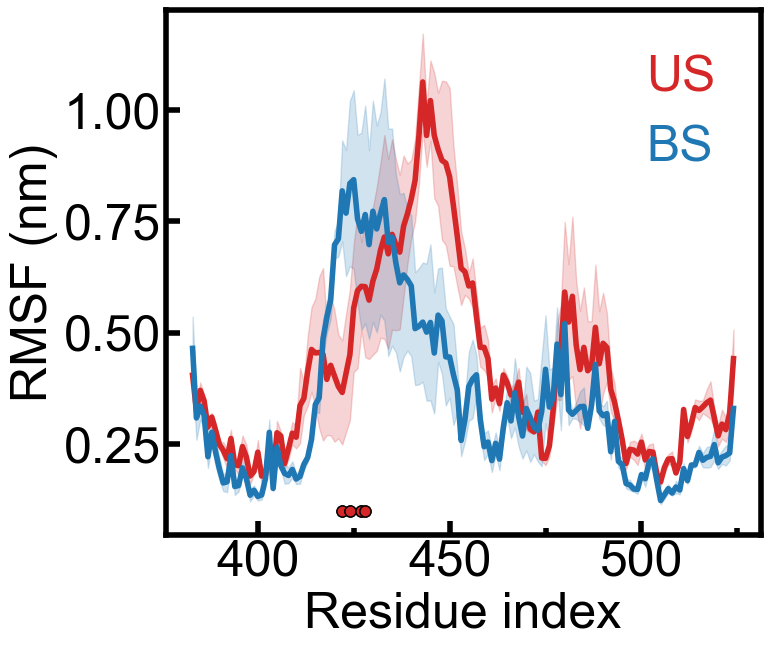

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

# 定义平滑函数
def smooth(data, window_size):
    """对数据应用滑动平均平滑"""
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


# 设置全局样式，符合 Nature 风格
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 36,  # 标题字体大小
    'axes.labelsize': 36,  # 坐标轴标签字体大小
    'xtick.labelsize': 36,  # X轴刻度字体大小
    'ytick.labelsize': 36,  # Y轴刻度字体大小
    'legend.fontsize': 36,  # 图例字体大小
    'figure.figsize': (8.5, 7),  # 图像大小
    'axes.linewidth': 4,  # 坐标轴线宽
    'xtick.major.size': 10, # x 轴主刻度长度
    'ytick.major.size': 10, # y 轴主刻度长度
    'xtick.minor.size': 5, # x 轴次刻度长度
    'ytick.minor.size': 5, # y 轴主刻度长度
    'xtick.major.width': 4, # x 轴主刻度线宽
    'ytick.major.width': 4, # y 轴主刻度线宽
    'xtick.minor.width': 4, # x 轴次刻度线宽
    'ytick.minor.width': 4, # y 轴主刻度线宽
    'axes.grid': False,  # 关闭背景网格
})


# 设置平滑窗口大小
window_size = 1

# 对数据进行平滑
average_values1_smooth = smooth(average_values1, window_size)
average_values2_smooth = smooth(average_values2, window_size)

# 调整 x 数据长度匹配平滑后的数据
xdata_smooth = xdata1[:len(average_values1_smooth)]

# 绘制图像
fig, ax = plt.subplots(figsize=(8.5, 7))

# 绘制带阴影的误差区域（平滑后）
ax.plot(xdata_smooth, average_values1_smooth, color='tab:red', label='US', linewidth=4)
ax.fill_between(xdata_smooth, 
                np.array(average_values1_smooth) - np.array(errors1[:len(average_values1_smooth)]), 
                np.array(average_values1_smooth) + np.array(errors1[:len(average_values1_smooth)]), 
                color='tab:red', alpha=0.2)

ax.plot(xdata_smooth, average_values2_smooth, color='tab:blue', label='BS', linewidth=4)
ax.fill_between(xdata_smooth, 
                np.array(average_values2_smooth) - np.array(errors2[:len(average_values2_smooth)]), 
                np.array(average_values2_smooth) + np.array(errors2[:len(average_values2_smooth)]), 
                color='tab:blue', alpha=0.2)

# 添加网格线
#ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# 坐标轴标签和标题
ax.set_xlabel('Residue index')
ax.set_ylabel('RMSF (nm)')
#ax.set_title('RMSF with Resi_number')
# 加粗刻度字体
#plt.setp(ax.get_xticklabels(), fontweight='bold')
#plt.setp(ax.get_yticklabels(), fontweight='bold')

# x 轴刻度朝内
ax.tick_params(axis='x', which='both', direction='in')
# y 轴刻度朝内
ax.tick_params(axis='y', which='both', direction='in')


# 设置y轴的刻度为科学记数法，并只显示数值部分
formatter = ScalarFormatter()
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))  # 显示科学记数法时，只显示数值部分

# 应用格式
plt.gca().yaxis.set_major_formatter(formatter)

# 调整横坐标和纵坐标间隔
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))  # 横坐标主刻度间隔
ax.xaxis.set_minor_locator(ticker.MultipleLocator(25))  # 横坐标次刻度间隔
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))  # 纵坐标主刻度间隔
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.15))  # 纵坐标次刻度间隔

# 定义要添加短横线的位置
positions = [422, 424, 427, 428]

# 设置短横线的 y 位置和长度
y_pos = 0.1  # 短横线的 y 坐标，靠近 x 轴下方

# 绘制短横线
for pos in positions:
    ax.plot([pos , pos], [y_pos, y_pos], marker='o', markersize=8, color='tab:red',markeredgecolor='black', markeredgewidth=1)  

# 图例
ax.legend(loc='upper right', frameon=False,handlelength=0, labelcolor='linecolor')

# 调整图形边距
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.15)  # 固定边距

# 保存高分辨率图片
plt.savefig("RMSF_with_Resi_number.png", dpi=300)
plt.show()